# AutoEQ - Convolution filter generator

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathfinder import Pathfinder

relative_paths = [['..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'],
                  ['..', '..', '..', '..', 'AutoEq'],
                  ['..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

import pandas as pd

from drc.sound import Sound, Channel, Blender, WaveFile
from drc.tuners.response.equalizer import ResponseEqualizer
from drc.measurements import Sampler
from drc.measurements.frequency.responses import FrequencyResponse
from drc.filters.peq import PEQs

# Microphone settings

In [3]:
# from pprint import pprint

# pprint(Sound.scan_devices(0))

In [4]:
from drc.measurements.frequency.calibrations.miniDSP import UMIK1

fn_calibration = 'UMIK-1 cal file 7103946.txt'
# fn = 'UMIK-1 cal file 7103946_90deg.txt'

mic = UMIK1()
mic.load(file_name = fn_calibration, n_header_lines = 2);

# Utilities for sampling

In [5]:
# FrequencyResponse.FREQUENCY_TO_CENTER = [200, 5000]
# # FrequencyResponse.FREQUENCY_TO_CENTER = [200, 8000]
# FrequencyResponse.FREQUENCY_TO_CENTER = [20, 20000]
# FrequencyResponse.FREQUENCY_TO_CENTER = [100, 10000]  
# # FrequencyResponse.FREQUENCY_TO_CENTER = [50, 10000]  
# FrequencyResponse.FREQUENCY_TO_CENTER = 1000   
# FrequencyResponse.FREQUENCY_TO_CENTER = [100, 8000]  # best

In [6]:
def probe(n_samplings = 10):
    return mic.get_frequency_response(input_device_idx = 1, n_samplings = n_samplings)

def probe_channels(wait_sec = 2): 
    fr, _ = probe()        
    fr.plot_graph(raw_plot_kwargs= {'color': 'green', 'alpha': 0.5},
                  smoothed_plot_kwargs= {'color': 'red', 'alpha': 0.5});

# Read frequency response from csv file

In [8]:
# model_name = 'KZ_EDR1'
# model_name = 'QCY_QS2'
# model_name = 'Mi_NDZ_03_GB'
# model_name = 'NB speaker'
# model_name = 'BeatsPro'
# model_name = 'Racoon speakers'
model_name = 'JamBox'

In [ ]:
fn_measurement = f'c:\\Users\\Wei\\Desktop\\REW data\\{model_name} measurement.txt'
fr_measurement = FrequencyResponse.read_from_csv(fn_measurement)

# Read frequency response from the Web
https://github.com/jaakkopasanen/AutoEq/tree/master/results  
https://github.com/jaakkopasanen/AutoEq/tree/master/measurements

In [ ]:
model_name = 'Audeze LCD-X'
url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Audeze%20LCD-X/Audeze%20LCD-X.csv'

model_name = 'Beats Pro'
url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/measurements/oratory1990/data/onear/Beats%20Pro/Beats%20Pro.csv'

# model_name = 'AKG K371'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/results/oratory1990/harman_over-ear_2018/AKG%20K371/AKG%20K371.csv'

# model_name = 'Sennheiser HD650'
# url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Sennheiser%20HD%20650/Sennheiser%20HD%20650.csv'

# model_name = 'Sennheiser HD600'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/results/oratory1990/harman_over-ear_2018/Sennheiser%20HD%20600/Sennheiser%20HD%20600.csv'

# model_name = 'Sennheiser HD560S'
# url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Sennheiser%20HD%20560S/Sennheiser%20HD%20560S.csv'

# model_name = 'Sennheiser HD6XX'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/rtings/rtings_harman_over-ear_2018/Sennheiser%20HD%206XX/Sennheiser%20HD%206XX.csv'

# model_name = 'AKG K701'
# url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/rtings/rtings_harman_over-ear_2018/AKG%20K701/AKG%20K701.csv'

# model_name = 'Beyerdynamic DT880'
# url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/c352d1c1223b79f1daa7ab03b0a51cda86c33794/measurements/oratory1990/data/onear/Beyerdynamic%20DT%20880%20250%20Ohm/Beyerdynamic%20DT%20880%20250%20Ohm.csv'

# model_name = 'AKG N400'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/master/results/oratory1990/harman_in-ear_2019v2/AKG%20N400/AKG%20N400.csv'

# model_name = 'PSB M4U 8'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/master/results/oratory1990/harman_over-ear_2018/PSB%20M4U%208/PSB%20M4U%208.csv'

# model_name = 'Sony MDR-7506'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/oratory1990/harman_over-ear_2018/Sony%20MDR-7506/Sony%20MDR-7506.csv'


fr_measurement = FrequencyResponse.read_csv_from_url(url_measurement)
fr_measurement.name = model_name

# Take samples with microphone

In [9]:
_, fr_measurement = probe()
fr_measurement = fr_measurement.get_smoothed()

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


# Plot

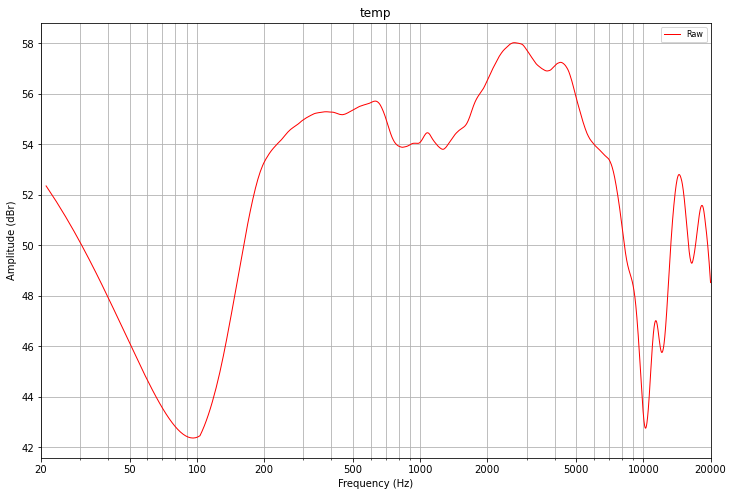

In [10]:
fr_measurement.reset()
fr_measurement.plot_graph(raw_plot_kwargs={'color': 'red'});

# Compensation

In [11]:
compensation_name = 'flat'
compensation_path = 'compensation/zero.csv'

# compensation_name = 'harman_over-ear_2013'
# compensation_path = 'compensation/harman_over-ear_2013.csv'

# compensation_name = 'harman_over-ear_2018'
# compensation_path = 'compensation/harman_over-ear_2018.csv'

compensation = FrequencyResponse.read_from_csv(compensation_path)

# Other headphones as compensation

In [12]:
# compensation_name = 'Sennheiser HD560S'
# url_compensation = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Sennheiser%20HD%20560S/Sennheiser%20HD%20560S.csv'

# compensation = FrequencyResponse.read_csv_from_url(url_compensation)

# Calculate filters coefficients 

### PEQ

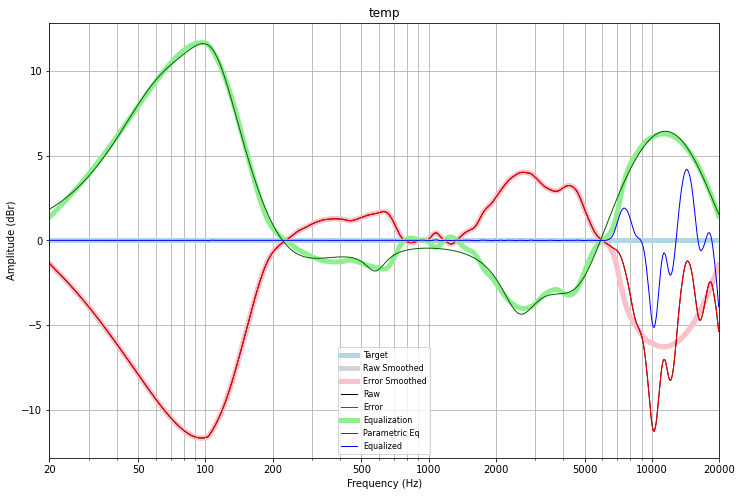

In [13]:
import time


n_filters = 10
# n_filters = [5, 5]
max_gain_dB = 12
bass_boost_gain = 0

measurement, peqs, n_peq_filters, peq_max_gains = \
    ResponseEqualizer.get_peq_filters(fr_measurement,
                                      compensation = compensation,
                                      max_filters = n_filters,
                                      max_gain_dB = max_gain_dB,
                                      bass_boost_gain = bass_boost_gain) 

# measurement.write_to_csv(f'results/{model_name} to {compensation_name} measurement.csv')

fn_filter_settings = f'results/{model_name} to {compensation_name} PEQ filters.txt'
peqs.dump(fn_filter_settings) 

measurement.plot_graph();

### Convolution filter

In [14]:
# import soundfile as sf
 
fs = 44100  # must match the sample rate of the DAC
DEFAULT_F_RES = 10 

C:\Softwares\Python\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


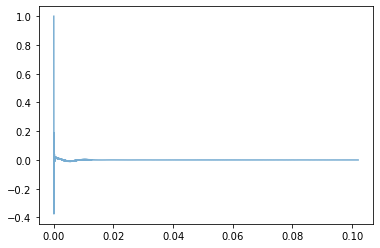

In [15]:
fn_filter_settings = f'results/{model_name} to {compensation_name} minimum phase convolution filters.wav'

measurement, ch = \
    ResponseEqualizer.get_convolution_filter(fr_measurement, compensation,
                                             file_path = fn_filter_settings,
                                             fs = fs,
                                             f_res = DEFAULT_F_RES,
                                             linear_phase = False,
                                             normalize = False,
                                             nchannels = 2,
                                             max_filters = n_filters,
                                             max_gain_dB = max_gain_dB,
                                             bass_boost_gain = bass_boost_gain)

ch.show(slice(None, None))

C:\Softwares\Python\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


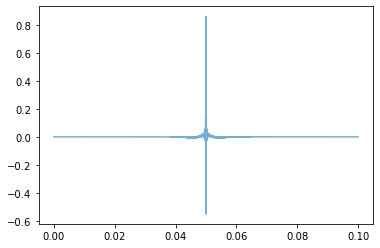

In [16]:
fn_filter_settings = f'results/{model_name} to {compensation_name} linear phase convolution filters.wav'

measurement, ch = \
    ResponseEqualizer.get_convolution_filter(fr_measurement, compensation,
                                             file_path = fn_filter_settings,
                                             fs = fs,
                                             f_res = DEFAULT_F_RES,
                                             linear_phase = True,
                                             normalize = False,
                                             nchannels = 2,
                                             max_filters = n_filters,
                                             max_gain_dB = max_gain_dB,
                                             bass_boost_gain = bass_boost_gain)

ch.show(slice(None, None))